## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIVE

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.unive.it/pag/17840/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Research: Ca' Foscari University of Venice


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://support.mozilla.org/en-US/kb/cookies-information-websites-store-on-your-computer%23w_cookie-settings',
 'http://www.unive.it',
 '//www.linkedin.com/school/cafoscari/',
 '/pag/35007/',
 '/pag/12641/',
 '/pag/17841/',
 '/pag/20075',
 '/pag/11609/',
 '/pag/28008/',
 '//www.twitter.com/cafoscari',
 '/pag/29567',
 '#',
 '//www.instagram.com/cafoscari/',
 '/pag/20829/',
 'http://help.opera.com/Windows/10.00/it/cookies.html',
 'https://www.facebook.com/policies/cookies/',
 'https://support.google.com/chrome/answer/95647?co=GENIE.Platform%3DDesktop&hl=en-GB',
 'https://twitter.com/it/privacy',
 '/pag/34871/',
 '/pag/17839/',
 'mailto:dpo@unive.it',
 '//www.unive.it/english',
 '/pag/39889/',
 '/wifi-eng',
 'https://www.unive.it/data/accesso',
 '//www.telegram.me/cafoscari',
 '//www.unive.it/radiocafoscari',
 '//www.flickr.com/photos/cafoscari/',
 '/pag/17889/',
 '#lista',
 'https://support.apple.com/en-gb/guide/safari/sfri11471/mac',
 '//www.youtube.com/user/youcafoscari',
 '/pag/1378

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.unive.it/pag/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.unive.it/pag/29567/', 'https://www.unive.it/pag/17993/']

In [5]:
lista_url3 = list(filter(lambda x: x.startswith('/pag'), res))
lista_url3=list(set(lista_url3))
lista_url3
string = 'https://www.unive.it/' 
lista_url3 = [string+x for x in lista_url3]
lista_url3

['https://www.unive.it//pag/35007/',
 'https://www.unive.it//pag/17841/',
 'https://www.unive.it//pag/12641/',
 'https://www.unive.it//pag/20075',
 'https://www.unive.it//pag/11609/',
 'https://www.unive.it//pag/28008/',
 'https://www.unive.it//pag/29567',
 'https://www.unive.it//pag/20829/',
 'https://www.unive.it//pag/34871/',
 'https://www.unive.it//pag/17839/',
 'https://www.unive.it//pag/39889/',
 'https://www.unive.it//pag/17889/',
 'https://www.unive.it//pag/29566',
 'https://www.unive.it//pag/13526/',
 'https://www.unive.it//pag/13785/',
 'https://www.unive.it//pag/11643/',
 'https://www.unive.it//pag/17891/',
 'https://www.unive.it//pag/16398/',
 'https://www.unive.it//pag/15123/',
 'https://www.unive.it//pag/29846/',
 'https://www.unive.it//pag/40524/',
 'https://www.unive.it//pag/36728/',
 'https://www.unive.it//pag/20058',
 'https://www.unive.it//pag/17888/',
 'https://www.unive.it//pag/17614/',
 'https://www.unive.it//pag/17840/',
 'https://www.unive.it//pag/29565',
 'http

In [6]:
lista_url2=[x for x in res if '/pag' in x]
lista_url2=list(set(lista_url2))
lista_url2

['/pag/35007/',
 '/pag/17841/',
 '/pag/12641/',
 '/pag/20075',
 '/pag/11609/',
 '/pag/28008/',
 '/pag/29567',
 '/pag/20829/',
 '/pag/34871/',
 '/pag/17839/',
 '/pag/39889/',
 '/pag/17889/',
 '/pag/29566',
 '/pag/13526/',
 '/pag/13785/',
 '/pag/11643/',
 '/pag/17891/',
 '/pag/16398/',
 '/pag/15123/',
 '/pag/29846/',
 '/pag/40524/',
 'https://www.unive.it/pag/29567/',
 '/pag/36728/',
 '/pag/20058',
 '/pag/17888/',
 '/pag/17614/',
 '/pag/17840/',
 'https://www.unive.it/pag/17993/',
 '/pag/29565',
 '/pag/25684/']

In [7]:
texts = []
title= []
for url in lista_url3[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"row"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

["Faculty and staff: Ca' Foscari University of Venice",
 "About: Ca' Foscari University of Venice",
 "Global: Ca' Foscari University of Venice",
 "Call Centre: Bachelor's and Master's Degrees",
 "Ricerca: Università Ca' Foscari Venezia",
 "Working in research: Ca' Foscari University of Venice",
 "Information on the processing of personal data of the website users: Ca' Foscari University of Venice",
 "Prospective students: Ca' Foscari University of Venice",
 "Civic engagement: Ca' Foscari University of Venice",
 "Academics and services: Ca' Foscari University of Venice",
 "Research evaluation: Ca' Foscari University of Venice",
 "Research in numbers: Ca' Foscari University of Venice",
 "Legal notes: Ca' Foscari University of Venice",
 "Home: Ca' Foscari University of Venice",
 "Students and alumni: Ca' Foscari University of Venice",
 'Home: Institute for Global Challenges',
 "Impact research: Ca' Foscari University of Venice",
 "Departments and Centres: Ca' Foscari University of Venice"

In [8]:
texts[0]

"\n\n\n\n\n\nCa' FoscariUniversityof Venice\n\n\n\n\n\n\nProspective students\nStudents and alumni\nFaculty and staff\n\n\n\n\n"

In [9]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [10]:
texts2[0]

"      Ca' FoscariUniversityof Venice       Prospective students Students and alumni Faculty and staff     "

In [11]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [12]:
texts3[0]

"Ca ' Prospective and alumni Faculty and staff"

### TEXT CLEANING

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

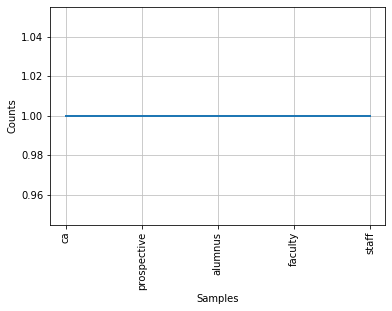

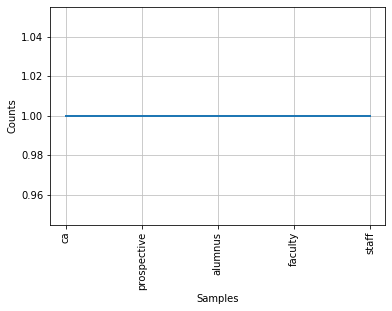

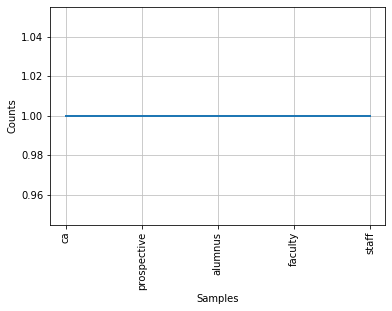

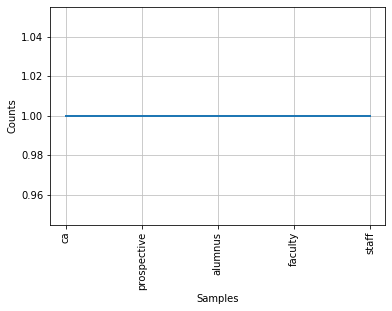

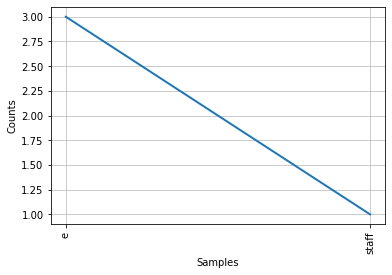

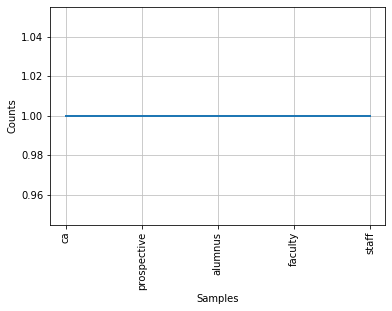

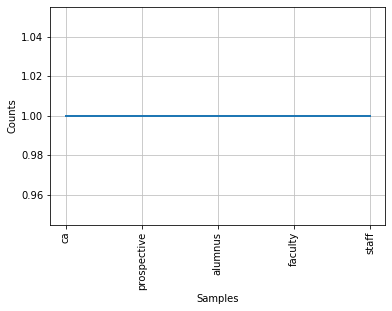

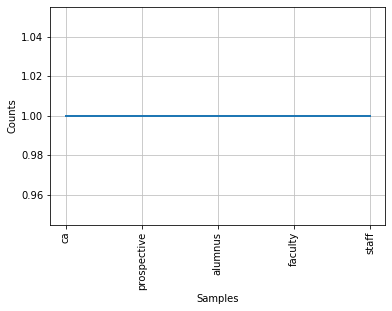

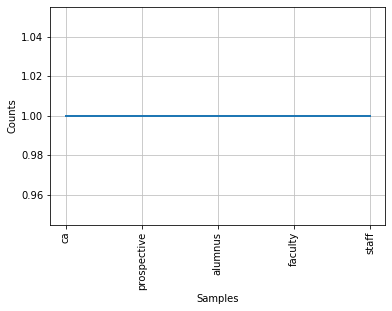

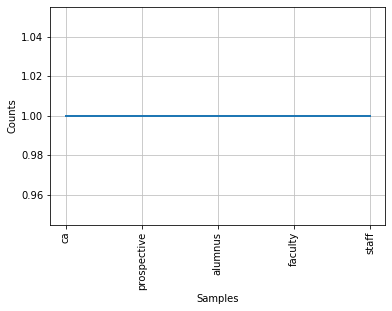

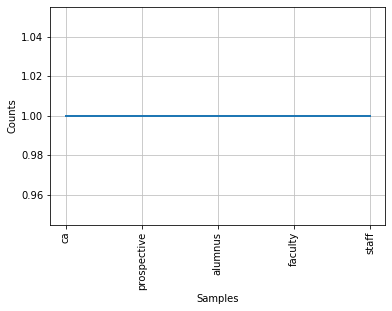

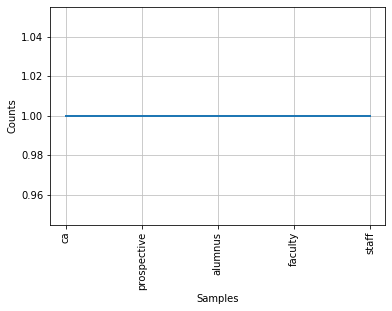

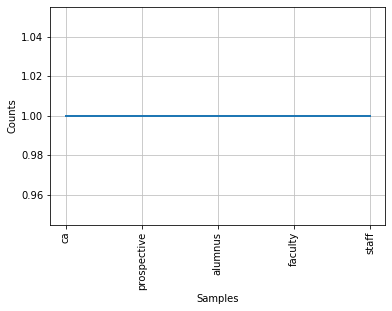

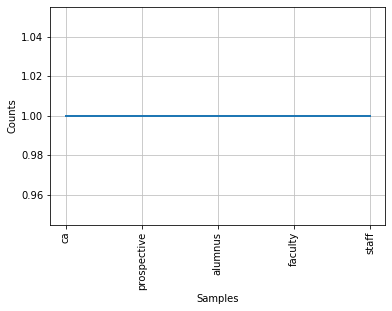

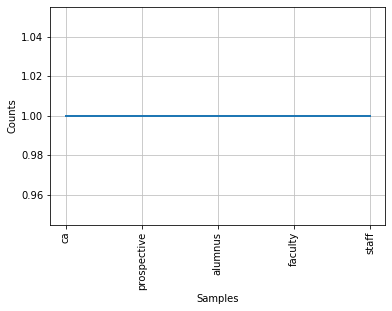

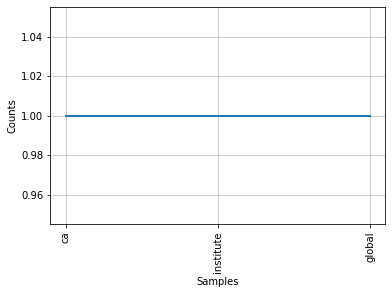

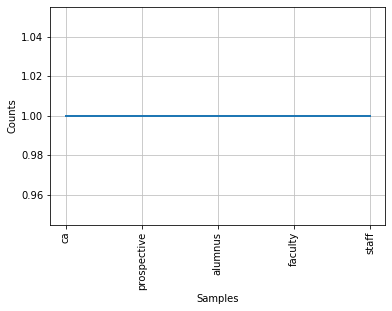

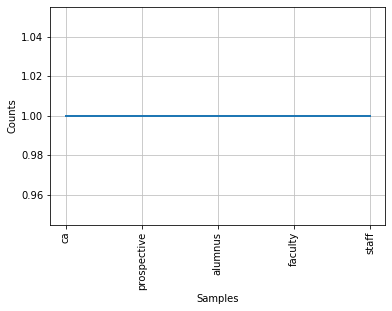

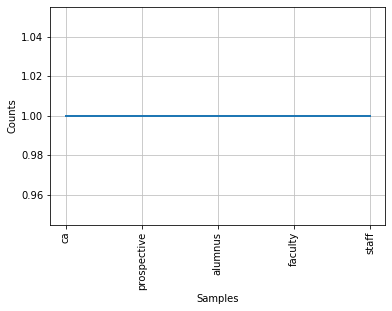

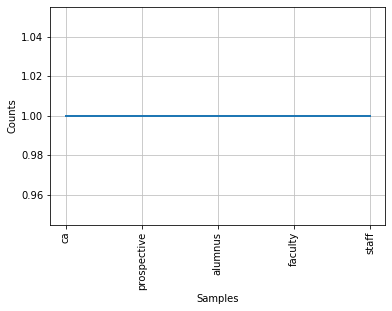

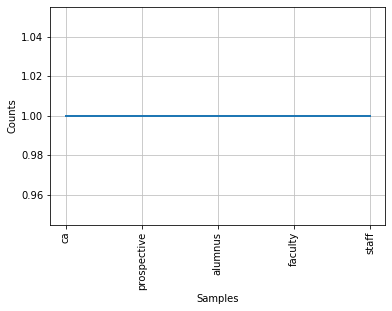

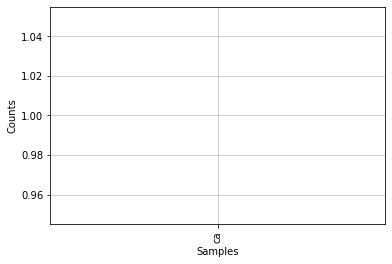

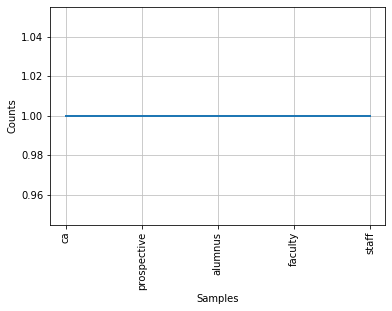

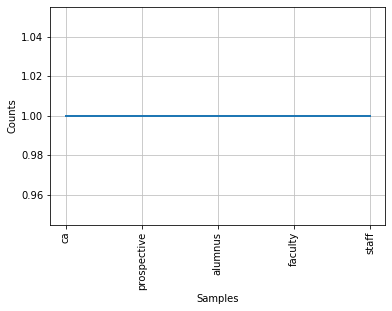

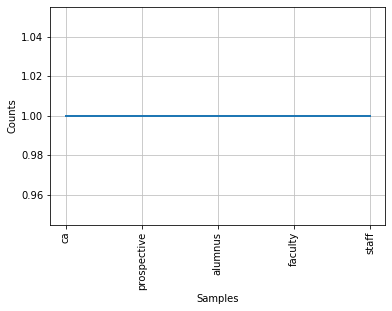

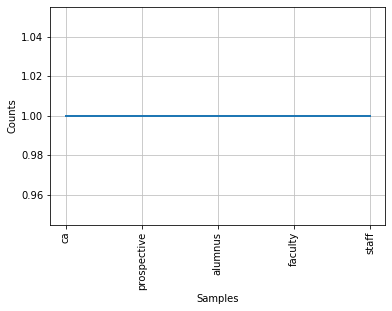

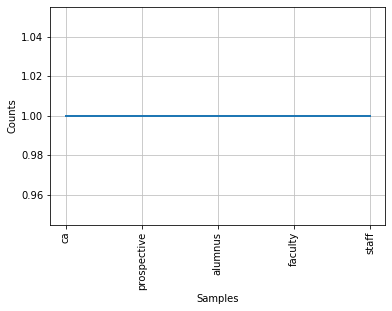

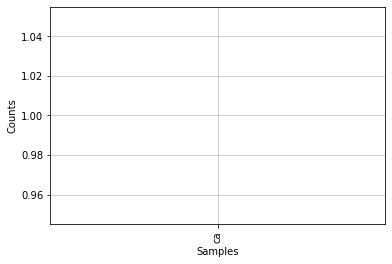

In [15]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [16]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Faculty and staff: Ca' Foscari University of V...,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
1,About: Ca' Foscari University of Venice,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
2,Global: Ca' Foscari University of Venice,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
3,Call Centre: Bachelor's and Master's Degrees,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
4,Ricerca: Università Ca' Foscari Venezia,"{'e': 3, 'staff': 1}"
5,Working in research: Ca' Foscari University of...,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
6,Information on the processing of personal data...,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
7,Prospective students: Ca' Foscari University o...,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
8,Civic engagement: Ca' Foscari University of Ve...,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."
9,Academics and services: Ca' Foscari University...,"{'ca': 1, 'prospective': 1, 'alumnus': 1, 'fac..."


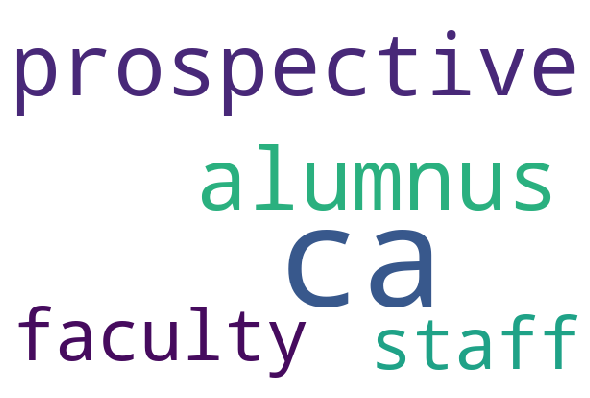

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [18]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [19]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

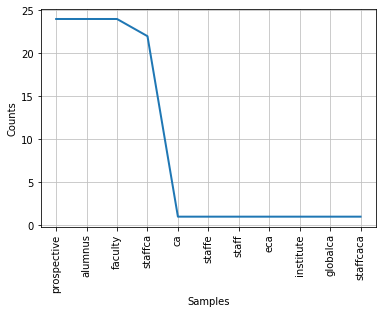

In [20]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [21]:
textfile = open('VERA.txt', 'w')
textfile.write(tot_text)
textfile.close()

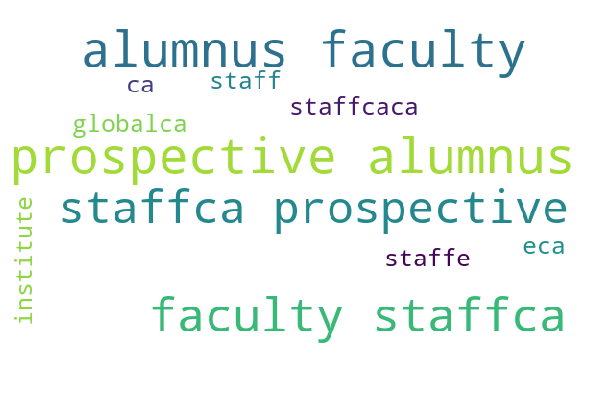

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()